Importing the dependencies

In [13]:
#Data manipulation 
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Handling imbalance
# from imblearn.over_sampling import SMOTE

#Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
 


Load Data to a pandas Dataset

In [2]:
#Loading the csv into a pandas Dataset
credit_card_data = pd.read_csv('./assets/creditcard.csv')

#Listing the first 5 rows of the dataset
credit_card_data.head()

#Listing the informations about the dataset
credit_card_data.info()

#Checking the number of missing values in the dataset
credit_card_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape and Columns of the Dataset

In [3]:
#Dataset Shape
print("Shape of dataset : ",credit_card_data.shape)

#Dataset columns
print("Columns in dataset : ",credit_card_data.columns.tolist())


Shape of dataset :  (284807, 31)
Columns in dataset :  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Class distribution

Class distribution
Class
0    284315
1       492
Name: count, dtype: int64


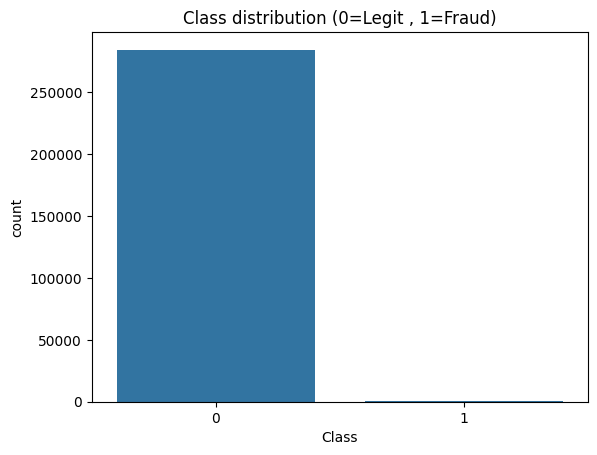

In [4]:
#Class distribution
print("Class distribution")
print(credit_card_data['Class'].value_counts())

#Visualizing the imbalance
sns.countplot(x='Class',data=credit_card_data)
plt.title('Class distribution (0=Legit , 1=Fraud)')
plt.show()

Preprocessing the data (Scalling the features and then split it into training and test sets)

In [5]:
#Scaling the amount and Time
credit_card_data['amount_scaled'] = StandardScaler().fit_transform(credit_card_data['Amount'].values.reshape(-1,1))
credit_card_data['time_scaled'] = StandardScaler().fit_transform(credit_card_data['Time'].values.reshape(-1,1))

#Dropping the original columns of amount and time and keeping only the scalled ones
credit_card_data.drop(['Amount','Time'], axis=1,inplace=True)

#Put the scaled columns in front
scaled_df = credit_card_data[['amount_scaled','time_scaled']+[col for col in credit_card_data.columns if col not in ['amount_scaled','time_scaled']]]


In [6]:
#Splitting into features and target
X = scaled_df.drop('Class',axis=1)
y = scaled_df['Class']


In [7]:
#Train/test split
#We gave 20% for test
x_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#Let's check the distribution in training set
print('Training set class distribution : ')
print(y_train.value_counts())

Training set class distribution : 
Class
0    227451
1       394
Name: count, dtype: int64


Let's balance the training set

In [12]:

from imblearn.over_sampling import SMOTE

#Initializing the smote
smote = SMOTE(random_state=42)

#Fit and balance the training sets
X_train_balanced,y_train_balanced = smote.fit_resample(x_train,y_train)

print("Class distribution in training set after balancing:")
print(y_train_balanced.value_counts())


Class distribution in training set after balancing:
Class
0    227451
1    227451
Name: count, dtype: int64


Model training (Logisic Regression)

In [14]:
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train_balanced,y_train_balanced)


LogisticRegression(max_iter=1000, random_state=42)

Model Evaluation

In [15]:
y_pred = model.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Classification report:",classification_report(y_test,y_pred))
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion Matrix: [[55406  1458]
 [    8    90]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy score: 0.9742635441171307
